## Import Required Libraries


In [1]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [2]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declare the network parameters

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs


In [3]:
# Network parameters
inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.1          # Learning rate
epochs = 180000   # Number of training epochs

## Define the weights
Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm


In [4]:
# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1         # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1         # Bias for output layer

## Training the Neural Network

The neural network works in 5 stages:
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [5]:
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.04759
Epoch: 19999, Average error: 0.02905
Epoch: 29999, Average error: 0.02258
Epoch: 39999, Average error: 0.01906
Epoch: 49999, Average error: 0.01678
Epoch: 59999, Average error: 0.01515
Epoch: 69999, Average error: 0.01391
Epoch: 79999, Average error: 0.01292
Epoch: 89999, Average error: 0.01212
Epoch: 99999, Average error: 0.01145
Epoch: 109999, Average error: 0.01088
Epoch: 119999, Average error: 0.01038
Epoch: 129999, Average error: 0.00994
Epoch: 139999, Average error: 0.00956
Epoch: 149999, Average error: 0.00922
Epoch: 159999, Average error: 0.00891
Epoch: 169999, Average error: 0.00863
Epoch: 179999, Average error: 0.00837


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [7]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00923062 0.99202832 0.99205569 0.00833118]]
Ground truth [0 1 1 0]
Error after training: [[-0.00923065  0.0079717   0.00794433 -0.00833121]]
Average error: 0.00837


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


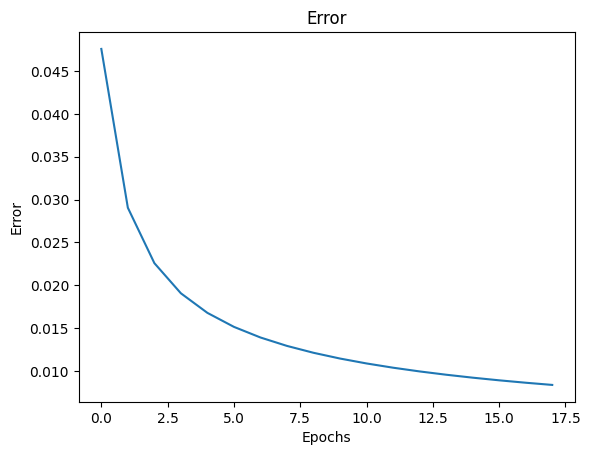

In [8]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practice exercise 1


Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


Epoch: 9999, Average error: 0.02499
Epoch: 19999, Average error: 0.01606
Epoch: 29999, Average error: 0.01255
Epoch: 39999, Average error: 0.01056
Epoch: 49999, Average error: 0.00925
Epoch: 59999, Average error: 0.00831
Epoch: 69999, Average error: 0.00759
Epoch: 79999, Average error: 0.00702
Epoch: 89999, Average error: 0.00655
Epoch: 99999, Average error: 0.00616
Epoch: 109999, Average error: 0.00583
Epoch: 119999, Average error: 0.00554
Epoch: 129999, Average error: 0.00529
Epoch: 139999, Average error: 0.00506
Epoch: 149999, Average error: 0.00487
Epoch: 159999, Average error: 0.00469
Epoch: 169999, Average error: 0.00453
Epoch: 179999, Average error: 0.00438
Final output after training: [[1.25794918e-04 5.56761859e-03 4.11679032e-03 9.92294350e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.0001258  -0.00556764 -0.0041168   0.00770567]]
Average error: 0.00438


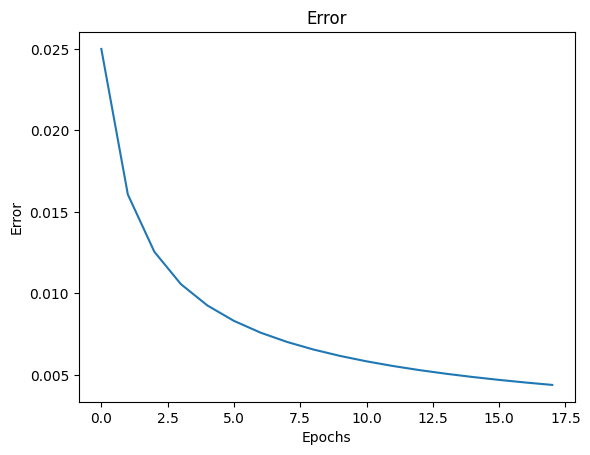

In [9]:
# Define the input and expected output for an AND gate problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
d = np.array([0, 0, 0, 1])

# Network parameters
inputSize = 2
hiddenSize = 2
outputSize = 1
lr = 0.1
epochs = 180000

# Initialize weights and biases
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
b1 = np.random.rand(hiddenSize, 1) * 2 - 1
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
b2 = np.random.rand(outputSize, 1) * 2 - 1

# Training the network
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1
    a1 = 1 / (1 + np.exp(-z1))

    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))

    # Error calculation and backpropagation
    error = d - a2
    da2 = error * (a2 * (1 - a2))
    dz2 = da2

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (a1 * (1 - a1))

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)

    if (epoch + 1) % 10000 == 0:
        print("Epoch: %d, Average error: %0.05f" % (epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

# Testing the network
z1 = np.dot(w1, X) + b1
a1 = 1 / (1 + np.exp(-z1))
z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f' % np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Double-click <b>here</b> for the solution.

<!-- Your answer is below:


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


# Practice exercise 2


Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate


Epoch: 99999, Average error: 0.02424
Epoch: 199999, Average error: 0.01468
Epoch: 299999, Average error: 0.01132
Epoch: 399999, Average error: 0.00950
Epoch: 499999, Average error: 0.00832
Epoch: 599999, Average error: 0.00748
Epoch: 699999, Average error: 0.00685
Epoch: 799999, Average error: 0.00635
Epoch: 899999, Average error: 0.00594
Epoch: 999999, Average error: 0.00560
Final output after training: [[3.30819520e-04 6.43972728e-03 6.49265136e-03 9.90878276e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00033082 -0.00643973 -0.00649266  0.00912173]]
Average error: 0.00560


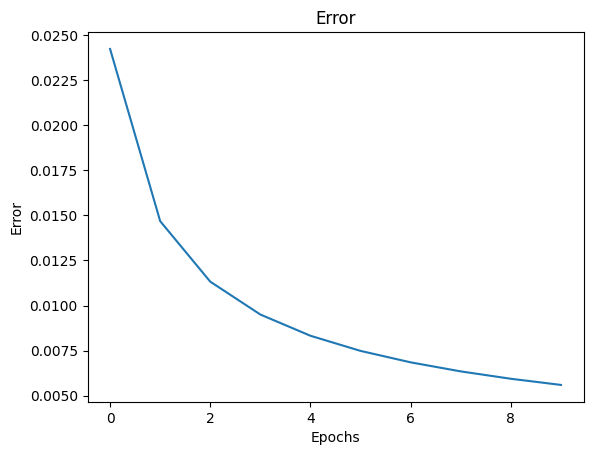

In [10]:
# Network parameters
inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.01          # Learning rate
epochs = 1000000   # Number of training epochs

# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1         # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1         # Bias for output layer

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%100000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

# Testing the network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
